In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn


In [2]:
import keras

Using CNTK backend


In [3]:
from keras import layers, models

## COMP 3132 -  Machine Learning with Python
__Week 9 lecture__

### [github.com/kamrik/ML2](https://github.com/kamrik/ML2)

### [slido.com/COMP3132](http://slido.com/COMP3132)


## Plan for today
 - Home assignment questions (if any)
 - Recap of the first half of the course
 - Deep learning for images - Convnets (chapter 5, till & including 5.2)
 

## Home assignment questions?
 - Due March 13
 - Start with the Yelp lab from previous term and newswires example from the book.
 

# Recap

## ML models - whether NNs or not
 - Come up with a model
 - Train / fit it by showing examples
 - Use it to predict and evaluate how good the prediction is

## Neuron
![neuron](https://naadispeaks.files.wordpress.com/2017/11/vqope.jpg?w=630)

## Inspired by, but not an accurate model of the real neuron
![real neuron](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)

## Layers
![layes](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

![more layers](https://www.pythonbots.ml/static/images/sw.png)

![learning](learning_dagram_fig3_1.png)
Figure 3.1, from the [book](https://www.manning.com/books/deep-learning-with-python)

## ConvNets
 - So far we used Dense layers
 - But for a picture of decent size like 1 MegaPixel that's too many connections
 - In ConvNets a unit is not connected to all units in the next layer

## Biological inspiration
 - Work by David Hubel & Torsten Wiesel in the 1960s showed that cat and monkey visual cortexes contain neurons that individually respond to small regions of the visual field [[wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#History)]
 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1557912/
 

![ConvNet](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

![layers](https://upload.wikimedia.org/wikipedia/commons/8/8a/Conv_layers.png)

## Example using MNIST digits

3


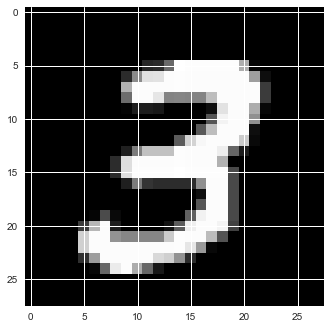

In [51]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[7])
ax = plt.imshow(train_images[7], cmap='gray')

In [52]:
# Some boring preprocessing
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [53]:
# One-hot encode the labels (targets)
from keras.utils import to_categorical
train_labels = to_categorical(train_labels).astype('float32')
test_labels = to_categorical(test_labels).astype('float32')

train_labels[7]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

## The model

In [54]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## MaxPooling
![maxpooling](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Dense layers on top of the Conv2D ones

In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [58]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(train_images, train_labels,
          epochs=5, batch_size=64, 
          validation_data=(test_images, test_labels)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s - loss: 0.0156 - acc: 0.9951 - val_loss: 0.0268 - val_acc: 0.9930
Epoch 2/5
60000/60000 [==============================] - 14s - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0281 - val_acc: 0.9926
Epoch 3/5
60000/60000 [==============================] - 15s - loss: 0.0109 - acc: 0.9970 - val_loss: 0.0311 - val_acc: 0.9924
Epoch 4/5
60000/60000 [==============================] - 14s - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0354 - val_acc: 0.9904
Epoch 5/5
60000/60000 [==============================] - 14s - loss: 0.0087 - acc: 0.9974 - val_loss: 0.0450 - val_acc: 0.9904
